In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import sys
#print(sys.path)
import argparse
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import datetime as dt
import cftime
import geopandas
import ast


import cartopy.io.shapereader as shpreader
from cartopy.io.shapereader import Reader
from cartopy.feature import ShapelyFeature

from plot_knutson import get_datasets
from shapely import vectorized


In [2]:
df_papers, df_1901_2010, df_1951_2010, df_1981_2010, arr_1901_2010, arr_1951_2010, arr_1981_2010, n_studies = get_datasets()

In [ ]:
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()

mesh=ax.pcolormesh(df_1901_2010.LON.values,df_1901_2010.LAT.values,n_studies.T,cmap=plt.cm.get_cmap('viridis'))
ax.set_title('N studies')
plt.colorbar(mesh)



##plot attribution datasets

ax3 = plt.axes(projection=ccrs.PlateCarree())
ax3.coastlines()

mesh=ax3.pcolormesh(df_1901_2010.LON.values,df_1901_2010.LAT.values,arr_1901_2010,cmap=plt.cm.get_cmap('BrBG',7), vmin=-3, vmax=3)
ax3.set_title('1901 to 2010')
plt.colorbar(mesh)



ax1 = plt.axes(projection=ccrs.PlateCarree())
ax1.coastlines()

mesh=ax1.pcolormesh(df_1951_2010.LON.values,df_1951_2010.LAT.values,arr_1951_2010,cmap=plt.cm.get_cmap('BrBG',7), vmin=-3, vmax=3)
ax1.set_title('1951 to 2010')
plt.colorbar(mesh)



ax2 = plt.axes(projection=ccrs.PlateCarree())
ax2.coastlines()

mesh=ax2.pcolormesh(df_1981_2010.LON.values,df_1981_2010.LAT.values,arr_1981_2010,cmap=plt.cm.get_cmap('BrBG',7), vmin=-3, vmax=3)
ax2.set_title('1981 to 2010')
plt.colorbar(mesh)


<ipython-input-3-746844d1358a>:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax3 = plt.axes(projection=ccrs.PlateCarree())
<ipython-input-3-746844d1358a>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1 = plt.axes(projection=ccrs.PlateCarree())
<ipython-input-3-746844d1358a>:30: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future ve

In [3]:
df_places=pd.read_csv('place_df.csv')
df_cat=pd.read_csv('category_predictions.csv')


df_places_cat = pd.merge(df_cat,df_places,left_on="id",right_on="doc_id")
df_places_cat.head()



,Unnamed: 0_x,id,content,title,wosarticle__de,wosarticle__wc,ar5,seen,relevant,12 - Coastal and marine Ecosystems,...,country_predicted,country_conf,geo,doc_id,lat,lon,feature_code,geonameid,place_name,feature_class
0,0,136746,"Grasslands, one of the most widespread land co...",Dynamic of grassland vegetation degradation an...,Grassland degradation; Climate change; Human i...,['Ecology'],0.0,0.0,0.0,0.0,...,CHN,0.999764,"{'admin1': 'NA', 'lat': '35', 'lon': '105', 'c...",136746,35.00,105.00,PCLI,1814991,People’s Republic of China,A
1,0,136746,"Grasslands, one of the most widespread land co...",Dynamic of grassland vegetation degradation an...,Grassland degradation; Climate change; Human i...,['Ecology'],0.0,0.0,0.0,0.0,...,CHN,0.993103,"{'admin1': 'Qinghai', 'lat': '36', 'lon': '96'...",136746,36.00,96.00,ADM1,1280239,Qinghai Sheng,A
2,0,136746,"Grasslands, one of the most widespread land co...",Dynamic of grassland vegetation degradation an...,Grassland degradation; Climate change; Human i...,['Ecology'],0.0,0.0,0.0,0.0,...,CHN,0.993103,"{'admin1': 'Inner Mongolia', 'lat': '43.5', 'l...",136746,43.50,114.75,ADM1,2035607,Inner Mongolia Autonomous Region,A
3,0,136746,"Grasslands, one of the most widespread land co...",Dynamic of grassland vegetation degradation an...,Grassland degradation; Climate change; Human i...,['Ecology'],0.0,0.0,0.0,0.0,...,CHN,0.993103,{'admin1': 'Xinjiang Uyghur Autonomous Region'...,136746,41.50,85.50,ADM1,1529047,Xinjiang Uygur Zizhiqu,A
4,0,136746,"Grasslands, one of the most widespread land co...",Dynamic of grassland vegetation degradation an...,Grassland degradation; Climate change; Human i...,['Ecology'],0.0,0.0,0.0,0.0,...,CHN,0.993103,"{'admin1': 'Gansu', 'lat': '37.75', 'lon': '10...",136746,37.75,102.75,ADM1,1810676,Gansu Sheng,A


In [4]:
df_places_cat['LAT'] = df_places_cat['lat']//2.5*2.5+1.25
df_places_cat['LON'] = df_places_cat['lon']//2.5*2.5+1.25
precip = df_places_cat[
    (df_places_cat['6 - Precipitation - mean_prediction']>0.5)
]
lon_df, lat_df = np.meshgrid(df_1951_2010.LON.values,df_1951_2010.LAT.values)


ndf = pd.DataFrame({"LAT": lat_df.ravel(), "LON": lon_df.ravel(), "N_Studies": n_studies.ravel(),
                  "Attr_Cat_1951_2010":arr_1951_2010.ravel()})

ndf.N_Studies=ndf.N_Studies.fillna(0)
ndf.head()

,LAT,LON,N_Studies,Attr_Cat_1951_2010
0,-88.75,181.25,0.0,NaN
1,-88.75,183.75,0.0,NaN
2,-88.75,186.25,0.0,NaN
3,-88.75,188.75,0.0,NaN
4,-88.75,191.25,0.0,NaN


In [40]:
precip_countries = precip[precip["feature_code"]=="PCLI"]
precip_countries['place_name']
precip.groupby(["feature_code"]).size().sort_values(ascending=False).to_frame()

,0
feature_code,
PCLI,1718
ADM1,714
PPL,507
ADM2,176
STM,160
...,...
GOVL,1
RK,1
DAMQ,1


In [105]:
import ast

precip_1=precip[precip["feature_code"]=="PCLI"]
precip_2=precip[precip["feature_code"]=="ADM1"]
precip_countries=pd.concat([precip_1,precip_2])
[ast.literal_eval(i) for i in precip_1.geo.to_list() if 'ARG' in ast.literal_eval(i)['country_code3']]


[{'admin1': 'Buenos Aires F.D.',
  'lat': '-34.57076',
  'lon': '-58.42754',
  'country_code3': 'ARG',
  'geonameid': '7838707',
  'place_name': 'Asociacioon Argentina de Polo',
  'feature_class': 'S',
  'feature_code': 'BLDG',
  'doc_id': 1543991},
 {'admin1': 'Buenos Aires F.D.',
  'lat': '-34.57076',
  'lon': '-58.42754',
  'country_code3': 'ARG',
  'geonameid': '7838707',
  'place_name': 'Asociacioon Argentina de Polo',
  'feature_class': 'S',
  'feature_code': 'BLDG',
  'doc_id': 2154816},
 {'admin1': 'Buenos Aires F.D.',
  'lat': '-34.57076',
  'lon': '-58.42754',
  'country_code3': 'ARG',
  'geonameid': '7838707',
  'place_name': 'Asociacioon Argentina de Polo',
  'feature_class': 'S',
  'feature_code': 'BLDG',
  'doc_id': 2322566},
 {'admin1': 'NA',
  'lat': '-34',
  'lon': '-64',
  'country_code3': 'ARG',
  'geonameid': '3865483',
  'place_name': 'Argentine Republic',
  'feature_class': 'A',
  'feature_code': 'PCLI',
  'doc_id': 1884980},
 {'admin1': 'Buenos Aires F.D.',
  'la

In [110]:
n_studies_country=precip_countries.groupby(["country_predicted"])
countries=precip["country_predicted"].unique()
countries
precip.groupby(["country_predicted"]).get_group('FRA')

,Unnamed: 0_x,id,content,title,wosarticle__de,wosarticle__wc,ar5,seen,relevant,12 - Coastal and marine Ecosystems,...,feature_code,geonameid,place_name,feature_class,LAT,LON,precip_da,gridcells,attrib_cells,feature_type
2797,2429,141229,The Fire Weather Index System has been in use ...,Summer Moisture and Wildfire Risks across Canada,0,['Meteorology & Atmospheric Sciences'],0.0,0.0,0.0,0.0,...,ADM2,3038049,Alpes-Maritimes,A,43.75,6.25,None,None,None,None
4639,3927,1423461,The extraordinary meteorological conditions of...,The impact of the heat wave of summer 2003 in ...,Drought; Remote sensing; Vegetation; Global ch...,"['Geosciences, Multidisciplinary; Meteorology ...",0.0,0.0,0.0,0.0,...,PPL,2971874,Tremblay-en-France,P,48.75,3.75,None,None,None,None
5110,4343,900794,Understanding how the interactions between ant...,How a new fire-suppression policy can abruptly...,abrupt changes; fire regime changes; fire-supp...,['Ecology'],0.0,0.0,0.0,0.0,...,PPL,2971874,Tremblay-en-France,P,48.75,3.75,None,None,None,None
6279,5337,738735,This article addresses the critical need for a...,Assessing the long-term impact of climatic var...,climate variability; long-term impact; water b...,['Water Resources'],0.0,0.0,0.0,0.0,...,PPL,2971874,Tremblay-en-France,P,48.75,3.75,None,None,None,None
12744,10906,1448264,The data set of the Warta discharges in Poznan...,Variability of the Warta River water discharge...,Warta River; variability of water discharge; w...,['Environmental Sciences'],0.0,0.0,0.0,0.0,...,PPL,3011312,Labarthe-sur-Lèze,P,43.75,1.25,None,None,None,None
20921,17951,513269,A new paleoclimatic reconstruction for western...,Changes in European precipitation seasonality ...,0,['Meteorology & Atmospheric Sciences'],0.0,0.0,0.0,0.0,...,PPL,2971874,Tremblay-en-France,P,48.75,3.75,None,None,None,None
20922,17951,513269,A new paleoclimatic reconstruction for western...,Changes in European precipitation seasonality ...,0,['Meteorology & Atmospheric Sciences'],0.0,0.0,0.0,0.0,...,ADM3,2983989,Arrondissement de Rennes,A,48.75,-1.25,None,None,None,None
20923,17951,513269,A new paleoclimatic reconstruction for western...,Changes in European precipitation seasonality ...,0,['Meteorology & Atmospheric Sciences'],0.0,0.0,0.0,0.0,...,ADM3,2988506,Paris,A,48.75,1.25,None,None,None,None
21406,18322,758674,"Multi-proxy, high-resolution analyses (litholo...",Palaeohydrological changes during the mid and ...,Lacustrine sediments; Geochemistry; Environmen...,"['Geography, Physical; Geosciences, Multidisci...",0.0,0.0,0.0,0.0,...,HTL,6528412,Hotel D Europe Avignon City Cen,S,43.75,3.75,None,None,None,None
22310,19132,218418,This exploratory study shows the chronology of...,Rainfall-run-off retrospective of extremes dro...,0,['Water Resources'],0.0,0.0,0.0,0.0,...,PPL,2971874,Tremblay-en-France,P,48.75,3.75,None,None,None,None


In [278]:
[ast.literal_eval(i)['place_name'] for i,j in zip(n_studies_country.get_group('KEN')['geo'],n_studies_country.get_group('ESP')['place_name']) if ast.literal_eval(i)['admin1']!='NA']

['Machakos', 'Laikipia', 'Trans Nzoia']

In [283]:
## start with loading country shape files and matching for disaggregation
from shapely import vectorized

shpfilename_count = shpreader.natural_earth(resolution='110m',
                                      category='cultural',
                                      name='admin_0_countries')


reader_count = shpreader.Reader(shpfilename_count)

shpfilename_reg = shpreader.natural_earth(resolution='10m',
                                      category='cultural',
                                      name='admin_1_states_provinces')
reader_reg = shpreader.Reader(shpfilename_reg)

yv, xv = np.meshgrid(df_1981_2010.LAT.values, df_1981_2010.LON.values)
xv[xv>180] = xv[xv>180] - 360
cn = np.full([72, 144],np.nan)


for country in reader_count.records():
    incountry = vectorized.contains(country.geometry,xv,yv)

    idx_country = np.argwhere(incountry==True)
    #print(idx)
    ndots = idx_country.size/2
    #print(country.attributes['SU_A3'],ndots)
    
    cdf=0
    
    #print(country.attributes)
    if np.any(countries==country.attributes['SU_A3']) and ndots!=0:
        pcli_size=len([ast.literal_eval(i)['geonameid'] for i in n_studies_country.get_group(country.attributes['SU_A3'])['geo'] if ast.literal_eval(i)['admin1']=='NA'])
        cdf = pcli_size/ndots
        
    for point in idx_country:
        #print(point)
        cn[point[1],point[0]] = cdf


##overlay regional disaggredation after finishing with country disaggregation
for region in reader_reg.records():
    if region.attributes['adm0_a3'] in ['KEN','GBR','BIH','ITA','ESP','SSD','SOM']:
        continue
    if np.any(countries==region.attributes['adm0_a3']):  
        
        
        adm1_list=np.array([int(ast.literal_eval(i)['geonameid']) for i in n_studies_country.get_group(region.attributes['adm0_a3'])['geo'] if ast.literal_eval(i)['admin1']!='NA'])
        
        if region.attributes['adm0_a3']=='ARG':
                adm1_list=np.zeros_like(adm1_list)+3435907
                
        if np.any(adm1_list==region.attributes['gn_id']):
            
            inregion = vectorized.contains(region.geometry,xv,yv)

            idx_region = np.argwhere(inregion==True)
            #print(idx)
            ndots = idx_region.size/2
            
            if ndots==0:
                ndots=0.09
            cdf=len(adm1_list[adm1_list==region.attributes['gn_id']])/ndots

            if region.attributes['adm0_a3']=='ARG':
                print(cdf)
            for point in idx_region:

                cn[point[1],point[0]] = cdf

shpfilename_reg='gadm36_levels_shp/gadm36_1.shp'
reader_reg = shpreader.Reader(shpfilename_reg)

for region in reader_reg.records():
    if region.attributes['GID_0'] not in ['KEN','GBR','BIH','ITA','ESP','SSD','SOM']:
        continue
    
    if np.any(countries==region.attributes['GID_0']):  
        
        adm1_list=np.array([ast.literal_eval(i)['place_name'] for i in n_studies_country.get_group(region.attributes['GID_0'])['geo'] if ast.literal_eval(i)['admin1']!='NA'])
        
        
        if np.any([adm1_list=='%s'%region.attributes['NAME_1']]):
            
            inregion = vectorized.contains(region.geometry,xv,yv)

            idx_region = np.argwhere(inregion==True)
            #print(idx)
            ndots = idx_region.size/2
            
            if ndots==0:
                ndots=0.09
                
            cdf=len(adm1_list[adm1_list=='%s'%region.attributes['NAME_1']])/ndots


            print(region.attributes['NAME_1'],cdf)
            for point in idx_region:

                cn[point[1],point[0]] = cdf

        
#ax = plt.axes(projection=ccrs.PlateCarree())
#ax.coastlines()

#mesh=ax.pcolormesh(df_1901_2010.LON.values,df_1901_2010.LAT.values,cn,cmap=plt.cm.get_cmap('BrBG',7), vmin=-3, vmax=3)
#ax.set_title('1901 to 2010')
#plt.colorbar(mesh)
#plt.show()

7.666666666666667
Andalucía 22.22222222222222
Cantabria 22.22222222222222
Galicia 22.22222222222222
Scotland 1.0
Basilicata 11.11111111111111
Calabria 2.0
Sardegna 22.22222222222222
Toscana 3.0
Veneto 11.11111111111111
Laikipia 11.11111111111111
Machakos 11.11111111111111
Trans Nzoia 11.11111111111111


<ipython-input-283-bdc611280b60>:83: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if np.any([adm1_list=='%s'%region.attributes['NAME_1']]):


In [ ]:
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()


mesh=ax.pcolormesh(df_1901_2010.LON.values,df_1901_2010.LAT.values,cn,cmap=plt.cm.get_cmap('BrBG',7), vmin=-3, vmax=3)
ax.set_title('1901 to 2010')
plt.colorbar(mesh)
plt.show()

In [279]:
#shpfilename = shpreader.natural_earth(resolution='10m',
#                                      category='cultural',
#                                      name='admin_1_states_provinces')

shpfilename_reg='gadm36_levels_shp/gadm36_1.shp'
reader = shpreader.Reader(shpfilename_reg)


for i in reader.records():
  
    try:
        if 'KEN' in i.attributes['GID_0']:

            print(i.attributes['NAME_1'])
    except:
        pass
    

Baringo
Bomet
Bungoma
Busia
Elgeyo-Marakwet
Embu
Garissa
Homa Bay
Isiolo
Kajiado
Kakamega
Kericho
Kiambu
Kilifi
Kirinyaga
Kisii
Kisumu
Kitui
Kwale
Laikipia
Lamu
Machakos
Makueni
Mandera
Marsabit
Meru
Migori
Mombasa
Murang'a
Nairobi
Nakuru
Nandi
Narok
Nyamira
Nyandarua
Nyeri
Samburu
Siaya
Taita Taveta
Tana River
Tharaka-Nithi
Trans Nzoia
Turkana
Uasin Gishu
Vihiga
Wajir
West Pokot


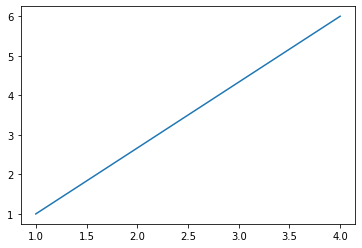

In [25]:
plt.plot(np.linspace(1,4,50),np.linspace(1,6,50))

In [284]:
np.save('N_studies_country_region', cn)

In [16]:
print([i.attributes["ISO3"] for i in reader.records()],'/n', n_studies_country.index.to_list())

['ATG', 'DZA', 'AZE', 'ALB', 'ARM', 'AGO', 'ASM', 'ARG', 'AUS', 'BHR', 'BRB', 'BMU', 'BHS', 'BGD', 'BLZ', 'BIH', 'BOL', 'MMR', 'BEN', 'SLB', 'BRA', 'BGR', 'BRN', 'CAN', 'KHM', 'LKA', 'COG', 'COD', 'BDI', 'CHN', 'AFG', 'BTN', 'CHL', 'CYM', 'CMR', 'TCD', 'COM', 'COL', 'CRI', 'CAF', 'CUB', 'CPV', 'COK', 'CYP', 'DNK', 'DJI', 'DMA', 'DOM', 'ECU', 'EGY', 'IRL', 'GNQ', 'EST', 'ERI', 'SLV', 'ETH', 'AUT', 'CZE', 'GUF', 'FIN', 'FJI', 'FLK', 'FSM', 'PYF', 'FRA', 'GMB', 'GAB', 'GEO', 'GHA', 'GRD', 'GRL', 'DEU', 'GUM', 'GRC', 'GTM', 'GIN', 'GUY', 'HTI', 'HND', 'HRV', 'HUN', 'ISL', 'IND', 'IRN', 'ISR', 'ITA', 'CIV', 'IRQ', 'JPN', 'JAM', 'JOR', 'KEN', 'KGZ', 'PRK', 'KIR', 'KOR', 'KWT', 'KAZ', 'LAO', 'LBN', 'LVA', 'BLR', 'LTU', 'LBR', 'SVK', 'LIE', 'LBY', 'MDG', 'MTQ', 'MNG', 'MSR', 'MKD', 'MLI', 'MAR', 'MUS', 'MRT', 'MLT', 'OMN', 'MDV', 'MEX', 'MYS', 'MOZ', 'MWI', 'NCL', 'NIU', 'NER', 'ABW', 'AIA', 'BEL', 'HKG', 'MNP', 'FRO', 'AND', 'GIB', 'IMN', 'LUX', 'MAC', 'MCO', 'PSE', 'MNE', 'MYT', 'ALA', 'NFK'

In [5]:
##make 0.25 by 0.25 grid
lat_vals=np.arange(df_1981_2010.LAT.values.min()-1.25,df_1981_2010.LAT.values.max()+1.25,0.25)
lon_vals=np.arange(df_1981_2010.LON.values.min()-1.25, df_1981_2010.LON.values.max()+1.25, 0.25)

print(len(lat_vals),len(df_1981_2010.LAT.values))
yv, xv = np.meshgrid(lat_vals, lon_vals)
xv[xv>180] = xv[xv>180] - 360


720 72


In [6]:
shpfilename = shpreader.natural_earth(resolution='50m',
                                      category='cultural',
                                      name='admin_0_countries')

adm0shps = geopandas.read_file(shpfilename)

attrib_df = ndf[pd.notna(ndf['Attr_Cat_1951_2010'])]
for i, place in adm0shps.iterrows():
    
    inplace = vectorized.contains(place.geometry,xv,yv)
    
    idx = np.argwhere(inplace==True)
    ndots = idx.size/2

    n_attributable_trend = 0
    for point in idx:
        lon = lon_vals[point[0]]
        lat = lat_vals[point[1]]
        da_cat = attrib_df[((lon>=attrib_df['LON']-1.25)&(lon<=attrib_df['LON']+1.25)) & ((lat>=attrib_df['LAT']-1.25)&(lat<=attrib_df['LAT']+1.25))]['Attr_Cat_1951_2010']
        if da_cat.shape[0] ==0:
            continue
        
        if abs(da_cat.values[0]) > 1:
            n_attributable_trend +=1
    adm0shps.loc[i,'points'] = str(idx)     
    adm0shps.loc[i,'gridcells'] = ndots
    adm0shps.loc[i,'precip_attrib_cells'] = n_attributable_trend

adm0shps.head()


,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,ADMIN,ADM0_A3,...,NAME_PT,NAME_RU,NAME_SV,NAME_TR,NAME_VI,NAME_ZH,geometry,points,gridcells,precip_attrib_cells
0,Admin-0 country,1,3,Zimbabwe,ZWE,0,2,Sovereign country,Zimbabwe,ZWE,...,ZimbÃ¡bue,ÐÐ¸Ð¼Ð±Ð°Ð±Ð²Ðµ,Zimbabwe,Zimbabve,Zimbabwe,è¾å·´å¨,"POLYGON ((31.28789 -22.40205, 31.19727 -22.344...",[[102 287]\n [102 288]\n [103 286]\n ...\n [13...,530.0,0.0
1,Admin-0 country,1,3,Zambia,ZMB,0,2,Sovereign country,Zambia,ZMB,...,ZÃ¢mbia,ÐÐ°Ð¼Ð±Ð¸Ñ,Zambia,Zambiya,Zambia,èµæ¯äº,"POLYGON ((30.39609 -15.64307, 30.25068 -15.643...",[[ 88 296]\n [ 88 297]\n [ 88 298]\n ...\n [13...,1007.0,207.0
2,Admin-0 country,1,3,Yemen,YEM,0,2,Sovereign country,Yemen,YEM,...,IÃ©men,ÐÐµÐ¼ÐµÐ½,Jemen,Yemen,Yemen,ä¹é¨,"MULTIPOLYGON (((53.08564 16.64839, 52.58145 16...",[[171 415]\n [171 416]\n [171 421]\n ...\n [21...,611.0,0.0
3,Admin-0 country,3,2,Vietnam,VNM,0,2,Sovereign country,Vietnam,VNM,...,Vietname,ÐÑÐµÑÐ½Ð°Ð¼,Vietnam,Vietnam,Viá»t Nam,è¶å,"MULTIPOLYGON (((104.06396 10.39082, 104.08301 ...",[[409 449]\n [410 448]\n [410 449]\n [410 450]...,447.0,96.0
4,Admin-0 country,5,3,Venezuela,VEN,0,2,Sovereign country,Venezuela,VEN,...,Venezuela,ÐÐµÐ½ÐµÑÑÑÐ»Ð°,Venezuela,Venezuela,Venezuela,å§å §çæ,"MULTIPOLYGON (((-60.82119 9.13838, -60.94141 9...",[[1147 397]\n [1148 397]\n [1148 398]\n ......,1191.0,157.0


In [66]:
ix=np.full([180,360],np.nan)
for points in adm0shps.points:
    points_1=points
    points=points.replace('   ',',').replace('  ',',').replace(' ',',').replace('\n ', ',').replace('[,','[').replace(',]',']')
    
    points=np.array(ast.literal_eval(points))
   
        


[[ 43 103]
 [ 43 104]
 [ 43 105]
 [ 43 106]
 [ 43 107]
 [ 44 103]
 [ 44 104]
 [ 44 105]
 [ 44 106]
 [ 44 107]
 [ 45 103]
 [ 45 104]
 [ 45 105]
 [ 45 106]
 [ 45 107]
 [ 46 104]
 [ 46 105]
 [ 46 106]
 [ 47 104]
 [ 47 105]
 [ 47 106]
 [ 48 104]
 [ 48 105]
 [ 48 106]
 [ 48 107]
 [ 49 105]
 [ 49 106]
 [ 49 107]
 [ 49 108]
 [ 50 105]
 [ 50 106]
 [ 50 107]
 [ 50 108]
 [ 51 105]
 [ 51 106]
 [ 51 107]
 [ 51 108]
 [ 52 106]
 [ 52 107]
 [ 52 108]]
[[ 56 132]
 [ 56 133]
 [ 56 134]
 [ 57 132]
 [ 57 133]
 [ 57 134]
 [ 57 135]
 [ 58 133]
 [ 58 134]
 [ 58 135]
 [ 59 133]
 [ 59 134]
 [ 60 132]
 [ 60 133]
 [ 60 134]
 [ 61 131]
 [ 61 132]
 [ 61 133]
 [ 62 131]
 [ 62 132]
 [ 62 133]
 [ 63 130]
 [ 63 131]
 [ 63 132]
 [ 63 133]
 [ 64 129]
 [ 64 130]
 [ 64 131]
 [ 64 132]
 [ 64 133]
 [ 65 129]
 [ 65 130]
 [ 65 131]
 [ 65 132]
 [ 65 133]
 [ 66 128]
 [ 66 129]
 [ 66 130]
 [ 66 131]
 [ 67 127]
 [ 67 128]
 [ 67 129]
 [ 67 130]
 [ 68 128]
 [ 68 130]
 [ 69 131]
 [ 70 131]]
[[  0 141]
 [  0 142]
 [  0 143]
 [  1 14

<ipython-input-66-84524e8ec0ed>:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  points=np.array(ast.literal_eval(points))


In [7]:
shpfilename = shpreader.natural_earth(resolution='10m',
                                      category='cultural',
                                      name='admin_1_states_provinces')

#shpfilename = "/home/max/Documents/resources/shpfiles/gadm36_1.shp"

adm1shps = geopandas.read_file(shpfilename)

attrib_df = ndf[pd.notna(ndf['Attr_Cat_1951_2010'])]
for i, place in adm1shps.iterrows():
    
    inplace = vectorized.contains(place.geometry,xv,yv)
    
    idx = np.argwhere(inplace==True)
    ndots = idx.size/2

    n_attributable_trend = 0
    for point in idx:
        lon = lon_vals[point[0]]
        lat = lat_vals[point[1]]
        da_cat = attrib_df[((lon>=attrib_df['LON']-1.25)|(lon<=attrib_df['LON']+1.25)) & ((lat>=attrib_df['LAT']-1.25)|(lat<=attrib_df['LAT']+1.25))]['Attr_Cat_1951_2010']
        if da_cat.shape[0] ==0:
            continue
        
        if abs(da_cat.values[0]) > 1:
            n_attributable_trend +=1
    adm1shps.loc[i,'points'] = str(idx)          
    adm1shps.loc[i,'gridcells'] = ndots
    adm1shps.loc[i,'precip_attrib_cells'] = n_attributable_trend

adm1shps.head()

,featurecla,scalerank,adm1_code,diss_me,iso_3166_2,wikipedia,iso_a2,adm0_sr,name,name_alt,...,name_ru,name_sv,name_tr,name_vi,name_zh,ne_id,geometry,points,gridcells,precip_attrib_cells
0,Admin-1 scale rank,3,ARG-1309,1309,AR-E,None,AR,1,Entre RÃ­os,Entre-Rios,...,Ð­Ð½ÑÑÐµ-Ð Ð¸Ð¾Ñ,Entre RÃ­os,Entre RÃ­os eyaleti,Entre RÃ­os,æ©ç¹é·éå¥¥æ¯ç,1159309789,"POLYGON ((-58.20011 -32.44713, -58.20012 -32.4...",[[1198 228]\n [1198 229]\n [1198 230]\n [11...,119.0,0.0
1,Admin-1 scale rank,6,URY-8,8,UY-PA,None,UY,1,PaysandÃº,None,...,ÐÐ°Ð¹ÑÐ°Ð½Ð´Ñ,PaysandÃº,Paysandu DepartmanÄ±,PaysandÃº,æ´¾æ¡æç,1159307733,"POLYGON ((-58.20012 -32.44720, -58.20011 -32.4...",[[1208 230]\n [1208 231]\n [1208 232]\n [12...,20.0,0.0
2,Admin-1 scale rank,3,PAK-1114,1114,PK-SD,None,PK,1,Sind,Sindh,...,Ð¡Ð¸Ð½Ð´,Sindh,Sind Eyaleti,Sindh,ä¿¡å¾·ç,1159309351,"MULTIPOLYGON (((68.18304 23.84216, 68.18301 23...",[[268 460]\n [269 458]\n [269 460]\n [269 461]...,199.0,0.0
3,Admin-1 scale rank,2,IND-3264,3264,IN-GJ,None,IN,1,Gujarat,None,...,ÐÑÐ´Ð¶Ð°ÑÐ°Ñ,Gujarat,Gucerat,Gujarat,å¤åæç¹é¦,1159314179,"POLYGON ((68.18301 23.84209, 68.18304 23.84216...",[[273 455]\n [274 454]\n [274 455]\n [275 453]...,263.0,0.0
4,Admin-1 scale rank,2,IDN-1185,1185,ID-KI,None,ID,5,Kalimantan Timur,Kaltim,...,ÐÐ¾ÑÑÐ¾ÑÐ½ÑÐ¹ ÐÐ°Ð»Ð¸Ð¼Ð°Ð½ÑÐ°Ð½,Kalimantan Timur,DoÄu Kalimantan,ÄÃ´ng Kalimantan,æ±å éæ¼ä¸¹ç,1159310009,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4...",[[456 363]\n [456 364]\n [457 363]\n [457 364]...,256.0,0.0


In [11]:
from tqdm import tqdm_notebook as tqdm

shpfilename='gadm36_levels_shp/gadm36_1.shp'
adm1shps_alt = geopandas.read_file(shpfilename)



attrib_df = ndf[pd.notna(ndf['Attr_Cat_1951_2010'])]
for i, place in tqdm(adm1shps_alt.iterrows()):
    
    inplace = vectorized.contains(place.geometry,xv,yv)
    
    idx = np.argwhere(inplace==True)
    ndots = idx.size/2

    n_attributable_trend = 0
    for point in idx:
        lon = lon_vals[point[0]]
        lat = lat_vals[point[1]]
        da_cat = attrib_df[((lon>=attrib_df['LON']-1.25)|(lon<=attrib_df['LON']+1.25)) & ((lat>=attrib_df['LAT']-1.25)|(lat<=attrib_df['LAT']+1.25))]['Attr_Cat_1951_2010']
   
        if da_cat.shape[0] ==0:
            continue
        
        if abs(da_cat.values[0]) > 1:
            n_attributable_trend +=1
            
    adm1shps_alt.loc[i,'points'] = str(idx)  
    adm1shps_alt.loc[i,'gridcells'] = ndots
    adm1shps_alt.loc[i,'precip_attrib_cells'] = n_attributable_trend

adm1shps_alt.head()

<ipython-input-11-cc3f2868ec80>:9: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i, place in tqdm(adm1shps_alt.iterrows()):


,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,geometry,points,gridcells,precip_attrib_cells
0,AFG,Afghanistan,AFG.1_1,Badakhshan,Badahšan,None,Velayat,Province,None,AF.BD,"POLYGON ((71.14804 36.00124, 71.14226 35.99334...",[[281 506]\n [281 507]\n [281 508]\n [281 509]...,67.0,0.0
1,AFG,Afghanistan,AFG.2_1,Badghis,Badghes|Badghisat|Badgis,None,Velayat,Province,None,AF.BG,"POLYGON ((63.09734 34.64551, 63.08250 34.65775...",[[251 500]\n [252 499]\n [252 500]\n [252 501]...,31.0,0.0
2,AFG,Afghanistan,AFG.3_1,Baghlan,Baglan|Bughlan,None,Velayat,Province,None,AF.BL,"POLYGON ((67.35538 34.88549, 67.35532 34.88847...",[[270 500]\n [270 501]\n [271 500]\n [271 501]...,34.0,0.0
3,AFG,Afghanistan,AFG.4_1,Balkh,Balh|Mazar-i-Sharif|Mazar,None,Velayat,Province,None,AF.BK,"POLYGON ((66.42347 35.64057, 66.44878 35.65366...",[[266 505]\n [266 508]\n [267 503]\n [267 504]...,27.0,0.0
4,AFG,Afghanistan,AFG.5_1,Bamyan,None,None,Velayat,Province,None,AF.BM,"POLYGON ((66.65279 34.00322, 66.65859 34.01669...",[[267 496]\n [267 497]\n [267 499]\n [267 500]...,22.0,0.0


POLYGON ((168.2265731128962 -15.98967864375589, 168.2041121753962 -15.99138762813088, 168.1922713550837 -15.98442962031838, 168.1872664722713 -15.97002532344338, 168.1837264332088 -15.92962005000591, 168.1659041675838 -15.86931731563088, 168.1549178394588 -15.79241301875594, 168.1309920582088 -15.73650481563091, 168.1220809253962 -15.70086028438094, 168.1195174488337 -15.66155364375592, 168.1244002613338 -15.62029387813095, 168.1488143238338 -15.54204680781841, 168.1543074878962 -15.46209075313088, 168.1762801441463 -15.46050383906841, 168.1826278003962 -15.50676848750592, 168.1856795582087 -15.51677825313091, 168.1923934253963 -15.52568938594345, 168.1987410816462 -15.52849700313091, 168.2036238941462 -15.53337981563092, 168.2055770191463 -15.54839446406847, 168.1977645191462 -15.60967376094342, 168.1992293628962 -15.62664153438091, 168.2129012378963 -15.65825774531847, 168.2129012378963 -15.68865325313094, 168.2159529957088 -15.70256926875592, 168.2393904957087 -15.76690032344339, 16

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [13]:
shpfilename = shpreader.natural_earth(resolution='10m',
                                      category='physical',
                                      name='geography_regions_polys')
geography = geopandas.read_file(shpfilename)
attrib_df = ndf[pd.notna(ndf['Attr_Cat_1951_2010'])]
for i, place in geography.iterrows():
    
    inplace = vectorized.contains(place.geometry,xv,yv)
    idx = np.argwhere(inplace==True) 
    #print(idx)##make 1 by 1 grid

    ndots = idx.size/2
    n_attributable_trend = 0
    for point in idx:
        lon = lon_vals[point[0]]
        lat = lat_vals[point[1]]
        da_cat = attrib_df[((lon>=attrib_df['LON']-1.25)|(lon<=attrib_df['LON']+1.25)) & ((lat>=attrib_df['LAT']-1.25)|(lat<=attrib_df['LAT']+1.25))]['Attr_Cat_1951_2010']
   
        if da_cat.shape[0] ==0:
            continue
        if abs(da_cat.values[0]) > 1:
            n_attributable_trend +=1
    
    geography.loc[i,'points'] = str(idx)  
    geography.loc[i,'gridcells'] = ndots
    geography.loc[i,'precip_attrib_cells'] = n_attributable_trend
geography.loc[(geography["featurecla"]=="Range/mtn") & (geography["name"].str.contains("Altay", case=False)),"name"] = "Altay"
geography.loc[(geography["featurecla"]=="Range/mtn") & (geography["name"].str.contains("Appalach", case=False)),"name"] = "Appalachian Mountains"
geography.loc[(geography["featurecla"]=="Range/mtn") & (geography["name"].str.contains("cant", case=False)),"name"] = "Cordillera Cantábrica"
geography.loc[(geography["featurecla"]=="Range/mtn") & (geography["name"].str.contains("Dabie", case=False)),"name"] = "Dabie Shan"
geography.loc[(geography["featurecla"]=="Range/mtn") & (geography["name"].str.contains("EASTERN GHATS", case=False)),"name"] = "Eastern Ghāts"
geography.loc[(geography["featurecla"]=="Range/mtn") & (geography["name"].str.contains("WESTERN GHATS", case=False)),"name"] = "Western Ghāts"
geography.loc[(geography["featurecla"]=="Range/mtn") & (geography["name"].str.contains("kunlun", case=False)),"name"] = "Kalakunlun Shan"
geography.loc[(geography["featurecla"]=="Range/mtn") & (geography["name"].str.contains("LEN MOUNTAIN", case=False)),"name"] = "Kölen"
geography.loc[(geography["featurecla"]=="Range/mtn") & (geography["name"].str.contains("Taihang Mts.", case=False)),"name"] = "Taihang Shan"
geography.loc[(geography["featurecla"]=="Range/mtn") & (geography["name"].str.contains("Tatra Mts.", case=False)),"name"] = "Tatry"
geography.loc[(geography["featurecla"]=="Range/mtn") & (geography["name"].str.contains("TIAN SHAN", case=False)),"name"] = "Tien Shan"
geography.loc[(geography["featurecla"]=="Range/mtn") & (geography["name"].str.contains("andes", case=False)),"name"] = "Andes Mountains"
geography.loc[(geography["featurecla"]=="Range/mtn") & (geography["name"].str.contains("HINDU KUSH", case=False)),"name"] = "Hindū Kush"
geography.loc[(geography["featurecla"]=="Range/mtn") & (geography["name"].str.contains("Marrah Mts", case=False)),"name"] = "Jabal Marrah"
geography.loc[(geography["featurecla"]=="Range/mtn") & (geography["name"].str.contains("Lebanon", case=False)),"name"] = "Mount Lebanon"
geography.loc[(geography["featurecla"]=="Range/mtn") & (geography["name"].str.contains("KARAKORAM RA", case=False)),"name"] = "Karakorum Shan"
geography.loc[(geography["featurecla"]=="Desert") & (geography["name"].str.contains("Negev", case=False)), "name"] = "Negev"
geography.loc[(geography["featurecla"]=="Desert") & (geography["name"].str.contains("Atacama", case=False)), "name"] = "Atacama Desert"
geography.loc[(geography["featurecla"]=="Desert") & (geography["name"].str.contains("CHIHUAHUAN DESERT", case=False)), "name"] = "Chihuahua Desert"
geography.loc[(geography["featurecla"]=="Desert") & (geography["name"].str.contains("Lut desert", case=False)), "name"] = "God-e Lut"
geography.loc[(geography["featurecla"]=="Desert") & (geography["name"].str.contains("TAKLIMAKAN DESERT", case=False)), "name"] = "Takla Makan Desert"
geography.loc[(geography["featurecla"]=="Plateau") & (geography["name"].str.contains("mongol", case=False)), "name"] = "Nei Mongol Gaoyuan"
geography.loc[(geography["featurecla"]=="Plateau") & (geography["name"].str.contains("deccan", case=False)), "name"] = "Deccan"
geography.loc[(geography["featurecla"]=="Plateau") & (geography["name"].str.contains("chota", case=False)), "name"] = "Chota Nāgpur Plateau"
geography.loc[(geography["featurecla"]=="Plateau") & (geography["name"].str.contains("loess", case=False)), "name"] = "Huangtu Gaoyuan"
geography.loc[(geography["featurecla"]=="Plateau") & (geography["name"].str.contains("khorat", case=False)), "name"] = "Khorat Plateau"
geography.loc[(geography["featurecla"]=="Plateau") & (geography["name"].str.contains("tibet", case=False)), "name"] = "Qing Zang Gaoyuan"
geography.loc[(geography["featurecla"]=="Plateau") & (geography["name"].str.contains("polar", case=False)), "name"] = "South Polar Plateau"
geography.loc[(geography["featurecla"]=="Plateau") & (geography["name"].str.contains("YUNGUI", case=False)), "name"] = "Yungui Gaoyuan"
adm0shps.loc[adm0shps.NAME.str.contains("Kosovo"),"ADM0_A3"] = "XKX"
adm0shps.loc[adm0shps.NAME.str.contains("S. Sudan"),"ADM0_A3"] = "SSD"
geography.loc[
    (geography["featurecla"]=="Plateau") & (geography["name"].str.contains("cumberland", case=False)),["name","featurecla"]
] = ["Cumberland Plateau", "Plain"]
geography.loc[
    (geography["featurecla"]=="Plateau") & (geography["name"].str.contains("colorado", case=False)),["name","featurecla"]
] = ["San Francisco Plateau", "Plain"]
geography.loc[(geography["featurecla"]=="Plain") & (geography["name"].str.contains("gange", case=False)),"name"] = "Gangetic Plain"
geography.loc[(geography["featurecla"]=="Plain") & (geography["name"].str.contains("north china", case=False)),"name"] = "Huanghuai Pingyuan"
geography.head()

geography.to_file('geography.shp')

In [6]:
geography=geopandas.read_file('geography.shp')
adm0shps=geopandas.read_file('adm0shps.shp')
adm1shps=geopandas.read_file('adm1shps.shp')
adm1shps_alt=geopandas.read_file('adm1shps_alt.shp')
geography.head()

,featurecla,name,namealt,region,subregion,min_label,max_label,scalerank,label,wikidataid,...,name_sv,name_tr,name_vi,name_zh,wdid_score,ne_id,points,gridcells,precip_att,geometry
0,Island,Pentecost,None,Oceania,Melanesia,6.7,12.0,7,Pentecost I.,Q960808,...,Pentecost Island,None,None,å½­ç¹ç§æ¯ç¹å²,4,1159102327,[],0.0,0.0,"POLYGON ((168.22657 -15.98968, 168.20411 -15.9..."
1,Island,Anatom,None,Oceania,Melanesia,6.7,12.0,7,Anatom,Q528884,...,None,Anatom,None,é¿ç´æå§å³¶,4,1159102329,[],0.0,0.0,"POLYGON ((169.83790 -20.24737, 169.82997 -20.2..."
2,Island,Gaua,None,Oceania,Melanesia,6.7,12.0,7,Gaua,Q583383,...,None,None,None,å ç¦å³¶,4,1159102331,[[670 303]],1.0,0.0,"POLYGON ((167.52491 -14.14214, 167.58619 -14.1..."
3,Island,Utupua,None,Oceania,Melanesia,6.7,12.0,7,Utupua I.,Q2081472,...,Utupua,None,None,None,4,1159102333,[],0.0,0.0,"POLYGON ((166.52223 -11.27068, 166.52711 -11.2..."
4,Island,Vanikolo,None,Oceania,Melanesia,6.7,12.0,7,Vanikolo,Q1536424,...,Vanikoro,None,None,None,4,1159102335,[],0.0,0.0,"POLYGON ((166.93263 -11.66021, 166.91822 -11.6..."


In [13]:

precip_studies = precip
precip_studies["precip_da"] = None
precip_studies["gridcells"] = None
precip_studies["attrib_cells"] = None
precip_studies["feature_type"] = None
adm0shps.loc[adm0shps.NAME.str.contains("Kosovo"),"ADM0_A3"] = "XKX"
adm0shps.loc[adm0shps.NAME.str.contains("S. Sudan"),"ADM0_A3"] = "SSD"
feature_mapping = {
    "MTS": {"shpfile": geography, "featurecla_list": ["Range/mtn"]},
    "PLAT": {"shpfile": geography, "featurecla_list": ["Plateau"]},
    "PLN": {"shpfile": geography, "featurecla_list": ["Plain"]},
    "DSRT": {"shpfile": geography, "featurecla_list": ["Desert"]},
    #"BAY": {"shpfile": geography, "featurecla_list": ["Coast","Basin","Delta"]},
    "ADM1": {"shpfile": adm1shps, "featurecla_list": None},
    "PCLI": {"shpfile": adm0shps, "featurecla_list": None},
}

colors = ["Blues","Greens","Oranges","Purples","Reds","PuRd","YlGnBu"]

draw_pixellated = False
print_unfound = True

cn = np.zeros([2,720, 1440])
for i, (key, value) in enumerate(feature_mapping.items()):
    # Get the precip places with this type of feature
    sub_df = precip[precip["feature_code"]==key] 
    
   
    # Cycle through each place name
    for name, group in sub_df.groupby('place_name'):
        country=False
        # How many studies are there with this placename
        n = len(group.doc_id.unique())
        
        # Get the matching shapefile
        shp = value["shpfile"]
        if value["featurecla_list"] is not None:
            sub_shp = shp[
                (shp["featurecla"].isin(value["featurecla_list"])) & 
                (shp["name"].str.lower().str.replace("mts.","Mountains",regex=False)==name.lower().replace("mts.","Mountains").strip())
            ]
        else:
            if "gn_id" in shp.columns:
                sub_shp = shp[shp["gn_id"]==group.geonameid.values[0]]
                #sub_shp = shp[shp["NAME_1"]==group.place_name.values[0]]
            else:
                sub_shp = shp[shp["ADM0_A3"]==group.country_predicted.values[0]]
                country=True
                
        if sub_shp.shape[0]==0:
            if key=="ADM1":
                sub_shp = adm1shps_alt[
                    (adm1shps_alt["NAME_1"]==group.place_name.values[0]) |
                    (adm1shps_alt["VARNAME_1"].str.contains(group.place_name.values[0]))
                ]
                
        if sub_shp.shape[0]==0:
            if print_unfound:
                print(name, n, group.geonameid.values[0])
                print(name, n, group.country_predicted.values[0]) 
            continue
        
        
        ## add the number of studies within this geographical place into our grid space

        inplace = vectorized.contains(sub_shp.geometry.values[0],xv,yv)
        idx = np.argwhere(inplace==True) 

        for point in idx:
            
    
            cn[0,point[1],point[0]] += n/sub_shp.gridcells.values[0]
            #print(cn[0,point[1],point[0]],n/sub_shp.gridcells.values[0])
            if cn[1,point[1],point[0]]==0 & ~country:
                cn[1,point[1],point[0]] =  sub_shp.precip_att.values[0] / sub_shp.gridcells.values[0]


               
            

        
   

<ipython-input-13-cd1f89a6bd74>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  precip_studies["precip_da"] = None
<ipython-input-13-cd1f89a6bd74>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  precip_studies["gridcells"] = None
<ipython-input-13-cd1f89a6bd74>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/in

Absaroka Range 1 5636520
Absaroka Range 1 USA
Allegheny Mountains 1 4797086
Allegheny Mountains 1 USA
Band-e Shākh-e Takah 1 1457733
Band-e Shākh-e Takah 1 AFG
Beaver Kill Range 1 5108424
Beaver Kill Range 1 USA
Changbaek-sanjulgi 4 2038183
Changbaek-sanjulgi 4 CHN
Coleen Hills 1 5859693
Coleen Hills 1 USA
Da Hinggan Ling 2 2037962
Da Hinggan Ling 2 CHN
Eastern Carpathians 1 678596
Eastern Carpathians 1 ROU
Eastern Ghāts 1 1272125
Eastern Ghāts 1 IND
Great Himalaya Range 4 1252569
Great Himalaya Range 4 NPL
Har Yehuda 1 293206
Har Yehuda 1 ISR
Hengduan Shan 7 1281049
Hengduan Shan 7 CHN
Khrebet Kokshaltau 1 1503001
Khrebet Kokshaltau 1 CHN
Khrebet Saylyugem 1 1515286
Khrebet Saylyugem 1 MNG
Kryms’ki Hory 1 703866
Kryms’ki Hory 1 UKR
Kunlun Mountains 5 1280792
Kunlun Mountains 5 CHN
Kuznetskiy Alatau 1 1501081
Kuznetskiy Alatau 1 RUS
Nianqingtangla Shan 1 1280409
Nianqingtangla Shan 1 CHN
Olympic Mountains 2 5805710
Olympic Mountains 2 USA
Pyrénées Orientales 4 3113382
Pyrénées Oriental

In [17]:
np.array([]).shape

(0,)

In [12]:
np.save('Grid_level_n_studies_attr', cn)

In [9]:
cn[1,:,:][cn[1,:,:]!=0].shape

(230122,)